## [作業重點]
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

### 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=4)

# 建立模型
gbc = GradientBoostingClassifier()

# 訓練模型
gbc.fit(x_train, y_train)

# 預測測試集
y_pred = gbc.predict(x_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9644444444444444


In [4]:
gbc.n_estimators

100

In [13]:
len(digits.feature_names)

64

我調參數的測略是這樣的，先找出大一點learning rate(>0.1)，再從影響力大的參數開始調

In [5]:
import numpy as np
score = []
for i in np.linspace(0.1, 0.500 , 21):
    gbc = GradientBoostingClassifier(learning_rate = 1 )
    gbc.fit(x_train, y_train)
    temp = gbc.score(x_test, y_test)
    score.append(temp)

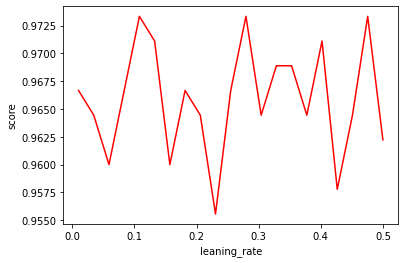

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0.01, 0.500 , 21),score ,color = 'r')
plt.xlabel('leaning_rate'),plt.ylabel('score')
plt.show()

In [7]:
print('best learning rate:',np.linspace(0.01, 0.500 , 21)[score.index(max(score))], '\nmax score:',max(score))

best learning rate: 0.108 
max score: 0.9733333333333334


為了獲得最優的參數，我們先設定一些初始值，如下：

* min_samples_split = 10：這個值得設定通常在樣本量的0.5-1%之間，但如果是不平衡樣本，值可以在設置的低一些
* min_samples_leaf = 4 :可根據直覺設置，這個參數的目的是用於防止過擬合，但是遇到不平衡數據時，可以考慮設置較低一些的值
* max_depth = 8 : 可以基於樣本量和特徵量設置在（5-8）左右
* max_features = ‘sqrt’ :看心情
* subsample = 0.8 : 這個是通常初始化的值 

In [9]:
#從影響力最大的n_estimators開始
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.108, min_samples_split=10,min_samples_leaf=4,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1,n_jobs=-1, cv=5)
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.108,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=4,
                                                  min_samples_split=10,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1, param_grid={'n_estimators': range(20, 81, 10)})

In [10]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 60}, 0.9799531873881315)

In [11]:
#再來是max_depth
param_test2 = {'max_depth':range(5,16,2)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.108, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2,n_jobs=-1, cv=5)
gsearch2.fit(x_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 11}, 0.9754922208453808)

**調整min_samples_leaf**

範圍10~100，步長5

**調整min_samples_splitf**

設置一個較大的min_samples_split，範圍4-100,步長3

In [16]:
param_test3 = {'min_samples_split':range(10,100,5), 'min_samples_leaf':range(4,100,3)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.108, n_estimators=60, max_depth=11, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3,n_jobs=-1, cv=5)
gsearch3.fit(x_train, y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 13, 'min_samples_split': 10}, 0.9814346688696132)

In [21]:
#max_features
param_test4 = {'max_features':range(5,51,3)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.108, n_estimators=60,max_depth=11, min_samples_leaf=13, min_samples_split=10, subsample=0.8, random_state=10), 
                        param_grid = param_test4, n_jobs = -1, cv=5)
gsearch4.fit(x_train, y_train)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 8}, 0.9814346688696132)

In [22]:
#subsample
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.108, n_estimators= 60,max_depth=11, min_samples_leaf=13, min_samples_split=10, random_state=10,max_features=8),
param_grid = param_test5,n_jobs=-1, cv=5)
gsearch5.fit(x_train, y_train)
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.8}, 0.9814346688696132)

In [24]:
gbc =GradientBoostingClassifier(learning_rate=0.108
                                , n_estimators= 60
                                ,max_depth=11
                                ,min_samples_split=10
                                , min_samples_leaf=13
                                , subsample=0.8
                                , random_state=10
                                ,max_features=8)
gbc.fit(x_train, y_train)

print(f'train score:{gbc.score(x_train, y_train)}')
print(f'test score:{gbc.score(x_test, y_test)}')

train score:1.0
test score:0.9822222222222222
